<h2>Bank Customer Churn Prediction Using Artificial Neural Networks (ANN)</h2>
<h3>1. Introduction</h3>
    <ul>
        <li><strong>Objective:</strong> The objective of this notebook is to build a predictive model using an Artificial Neural Network (ANN) to identify customers who are likely to churn (i.e., stop using the bank's services). By using historical data on customers, the model will help identify patterns and key factors that contribute to churn, ultimately allowing the bank to take preventive actions and retain high-value customers.</li>
        <li><strong>Business Problem:</strong> Customer churn is a critical issue for banks, as losing customers directly impacts revenue and profitability. Acquiring new customers is often more costly than retaining existing ones. Therefore, by accurately predicting which customers are likely to leave, banks can implement retention strategies, offer personalized services, and address customer concerns before they decide to close their accounts. This proactive approach helps banks maintain a competitive edge and improve customer loyalty, significantly enhancing long-term financial performance.</li>
    </ul>

In [1]:
#import essentila libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

  <h2>2. Data Understanding</h2>
    <ul>
        <li><strong>Dataset Overview:</strong> The dataset contains customer demographic information, bank-related features (such as account balance, tenure, and number of products), and a target variable indicating whether the customer has churned (1) or not (0).
.</li>
        <li><strong>Exploratory Data Analysis (EDA):</strong> Exploratory Data Analysis (EDA):
Initial analysis reveals patterns like higher churn rates among customers with lower balances, fewer products, and those with shorter tenures. Some demographic factors like age and geography also show a correlation with churn..</li>
    </ul>

In [2]:
#reading data
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#data shape
print('Dataset contain about {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

Dataset contain about 10000 rows and 14 columns.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#summarize data statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# Select categorical columns (e.g., 'object' or 'category' types)
categorical_features = df.select_dtypes(include=['object', 'category']).columns


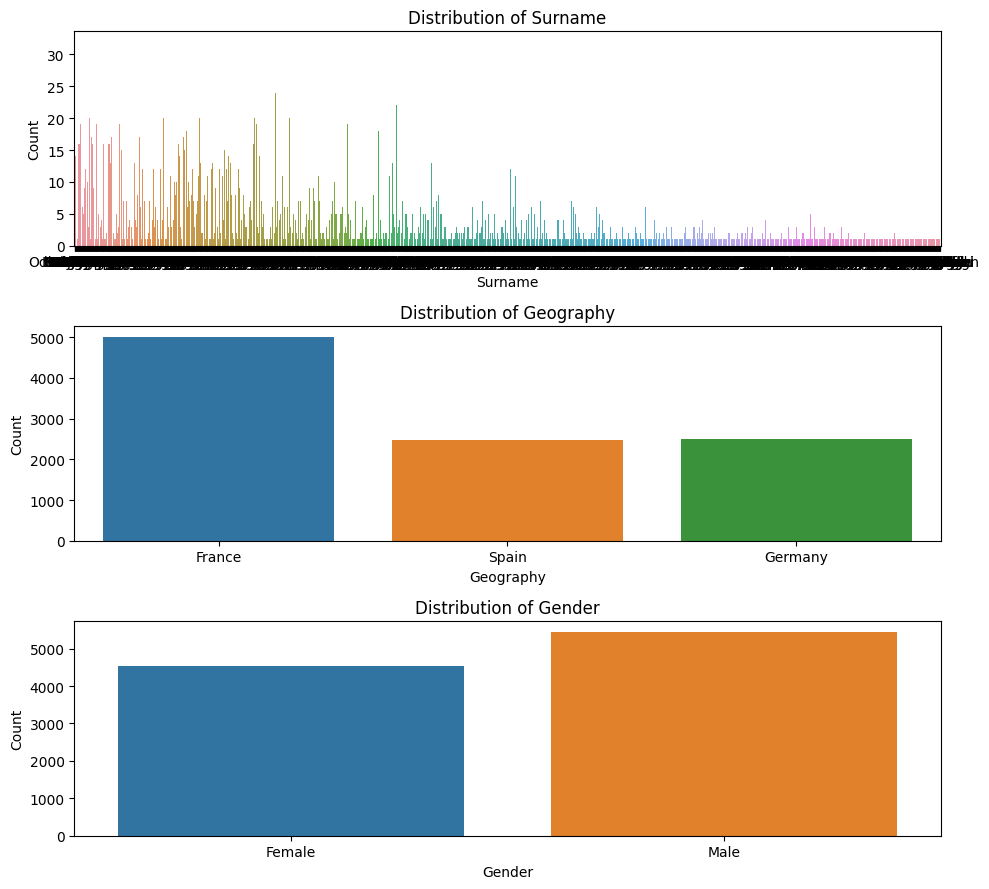

In [7]:
# Set up the size of the plots
plt.figure(figsize=(10, len(categorical_features) * 3))

# Loop through each categorical feature and create a count plot
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(len(categorical_features), 1, i)
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()


 ### Correlation Matrix (for numerical features)

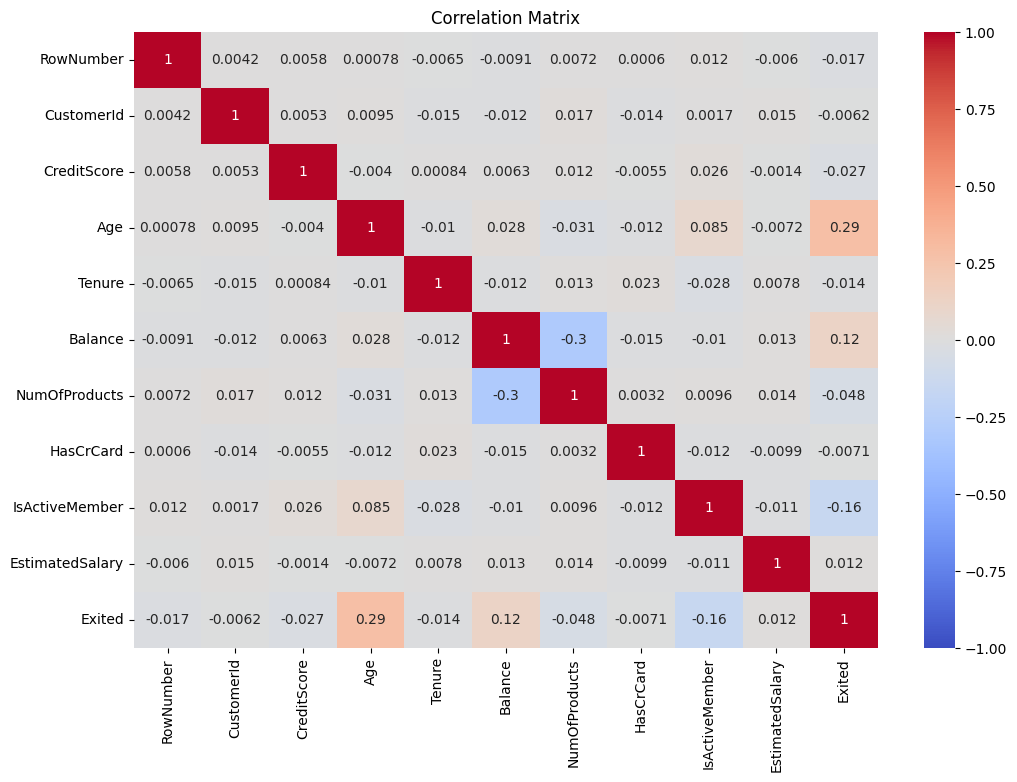

In [8]:
# Select only numerical columns from the dataframe
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot a heatmap of the correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [9]:
# Compute the correlation matrix
corr_matrix = numeric_df.corr().abs() 


In [10]:


 # Use absolute value to consider both positive and negative correlations

# Set a threshold for dropping features (e.g., correlations near 0)
threshold = 0.05  # This can be adjusted

# Identify columns with correlations less than the threshold with all other features
# Drop diagonal entries (self-correlation) and find columns where max correlation is below the threshold
drop_cols = [column for column in corr_matrix.columns if all(corr_matrix[column] < threshold)]

# Drop these columns from the original dataframe
df_cleaned = df.drop(columns=drop_cols)

print(f"Columns dropped due to low correlation: {drop_cols}")
print(f"Shape of the cleaned dataframe: {df_cleaned.shape}")


Columns dropped due to low correlation: []
Shape of the cleaned dataframe: (10000, 14)


 <h2>3. Data Preprocessing</h2>
    <ul>
        <li><strong>Handling Missing Data:</strong> Steps for dealing with missing or incomplete data.</li>
        <li><strong>Feature Scaling:</strong> Apply techniques like Standardization/Normalization.</li>
        <li><strong>Encoding Categorical Variables:</strong> Convert categorical features to numerical ones (e.g., One-Hot Encoding).</li>
    </ul> Data Preprocessing


In [11]:
#check if there is any null value
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])

import joblib
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

In [13]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


  <h2>4. Splitting the Dataset</h2>
    <ul>
        <li><strong>Train-Test Split:</strong> Explanation of splitting the data into training and test sets.</li>
    </ul>

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [15]:
#drop non important columns
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [16]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
x_train.shape

(8000, 10)

In [19]:
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

<h2>5. Building the ANN Model</h2>
    <ul>
        <li><strong>Model Architecture:</li>
        <li><strong>Activation Functions:</li>
        <li><strong>Model Compilation:</li>
    </ul>

In [20]:
import tensorflow as tf
from tensorflow import keras


In [21]:
def create_model(optimizer='adam', units=32):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=units, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(keras.layers.Dense(units=16, activation='relu'))
    model.add(keras.layers.Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [22]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
# Create the KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid of hyperparameters
param_grid = {
    'units': [16, 32, 64],  # Number of units in the hidden layer
    'optimizer': ['adam', 'rmsprop'],  # Optimizers to try
    'epochs': [50, 100],  # Number of epochs
    'batch_size': [10, 20]  # Batch sizes
}

# Set up the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)


In [23]:
from sklearn.model_selection import GridSearchCV
# Fit the grid search to the data
grid_result = grid.fit(x_train, y_train)


84/84 [==============================] - 0s 722us/step


In [24]:
from sklearn.metrics import classification_report
# Best model parameters
print("Best parameters:", grid_result.best_params_)

# Predict using the best model
best_model = grid_result.best_estimator_
y_pred = best_model.predict(x_test)

# Classification report
print(classification_report(y_test, y_pred))


Best parameters: {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam', 'units': 16}
63/63 [==============================] - 0s 647us/step
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1607
           1       0.68      0.56      0.61       393

    accuracy                           0.86      2000
   macro avg       0.79      0.75      0.77      2000
weighted avg       0.85      0.86      0.86      2000



In [25]:
from sklearn.model_selection import RandomizedSearchCV

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring='accuracy', n_iter=10, cv=3)

# Fit the model
random_search_result = random_search.fit(x_train, y_train)

# Best parameters
print("Best parameters:", random_search_result.best_params_)


84/84 [==============================] - 0s 711us/step
Best parameters: {'units': 16, 'optimizer': 'rmsprop', 'epochs': 100, 'batch_size': 10}


In [26]:
from keras.wrappers.scikit_learn import KerasClassifier
# Save the best model


# Assuming 'best_model' is your KerasClassifier object


  # Save model in HDF5 format
best_model = grid_result.best_estimator_.model  # Get the Keras model from the KerasClassifier
best_model.save('best_model.h5')

In [28]:
df2=pd.read_csv('Churn_Modelling.csv')
df2.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
df2['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

# Example geography categories in training data
geographies = ['France', 'Germany', 'Spain']

label_encoder = LabelEncoder()
label_encoder.fit(geographies)

# Save the encoder after fitting (this should have been done during training)
import joblib
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']